# Variant Calling Workflow

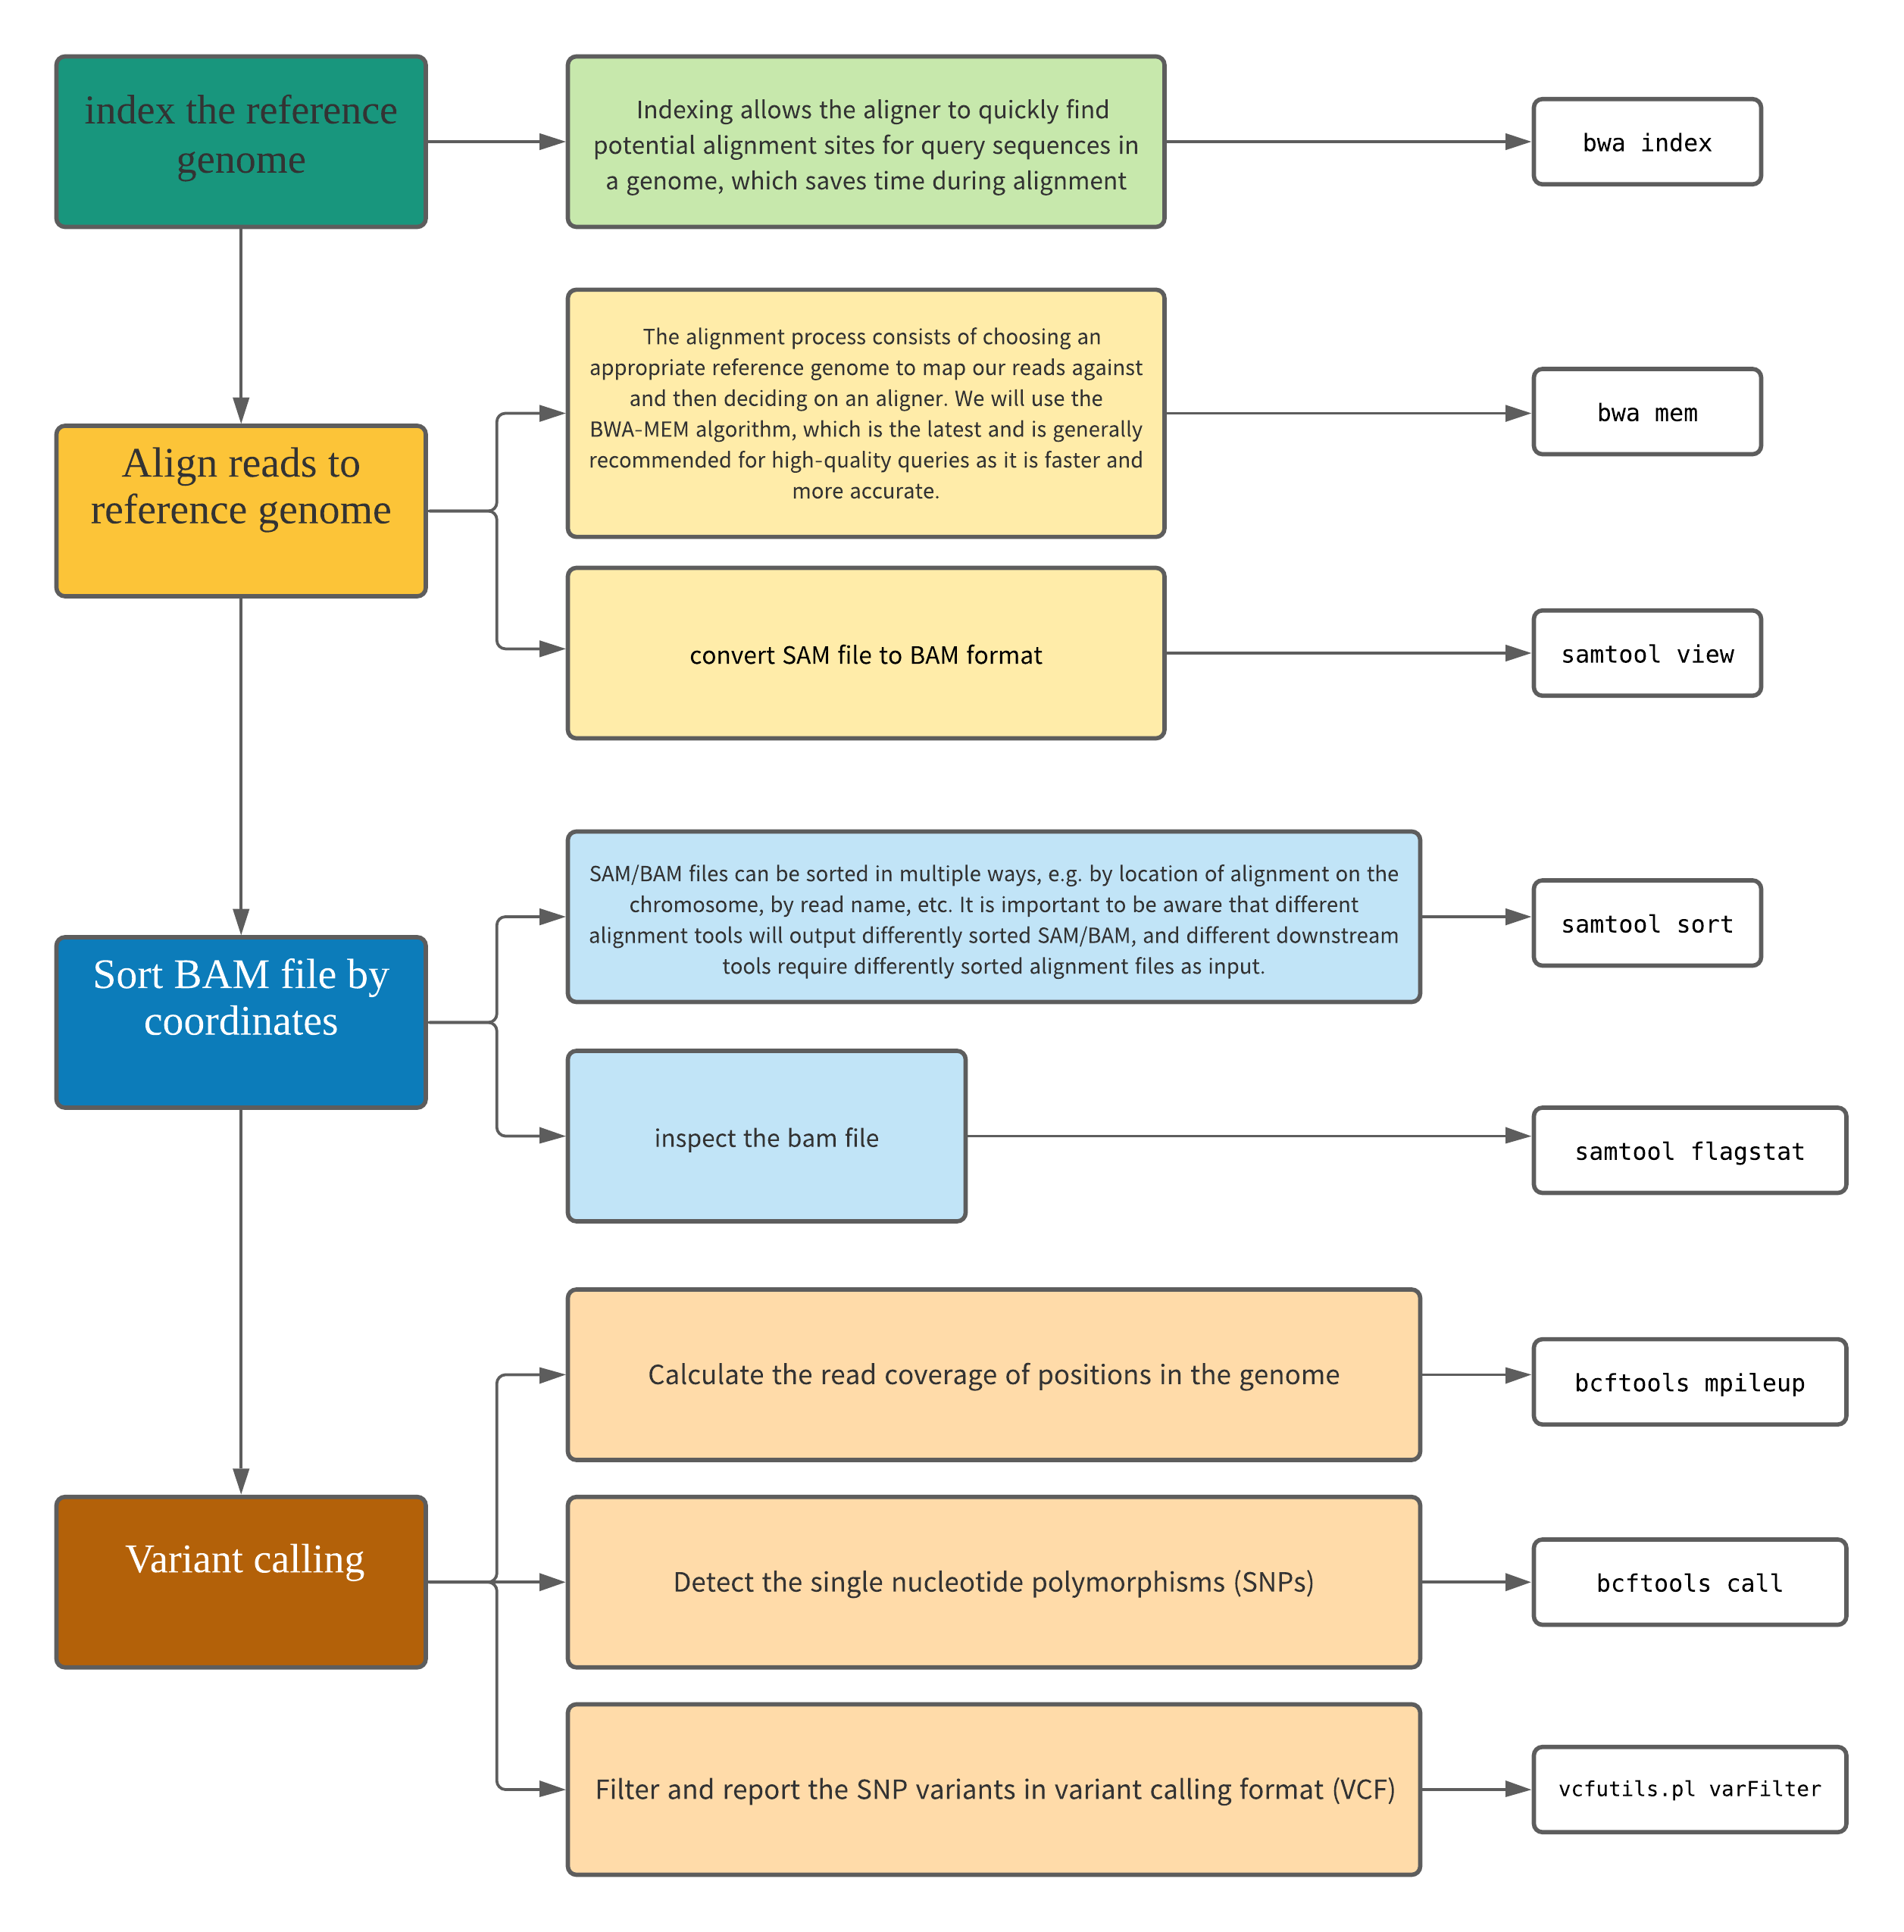

#### Index the reference Genome

In [ ]:
$ bwa index data/ref_genome/ecoli_rel606.fasta

#### Align Reads to Reference Genome

In [ ]:

$ bwa mem data/ref_genome/ecoli_rel606.fasta data/trimmed_fastq_small/SRR2584866_1.trim.sub.fastq \ data/trimmed_fastq_small/SRR2584866_2.trim.sub.fastq > results/sam/SRR2584866.aligned.sam

$ samtools view -S -b results/sam/SRR2584866.aligned.sam > results/bam/SRR2584866.aligned.bam


#### Sort BAM file by coordinates 

In [ ]:
$ samtools sort -o results/bam/SRR2584866.aligned.sorted.bam results/bam/SRR2584866.aligned.bam

$ samtools flagstat results/bam/SRR2584866.aligned.sorted.bam

#### Variant Calling

In [ ]:
$ bcftools mpileup -O b -o results/bcf/SRR2584866_raw.bcf -f data/ref_genome/ecoli_rel606.fasta results/bam/SRR2584866.aligned.sorted.bam

$ bcftools call --ploidy 1 -m -v -o results/vcf/SRR2584866_variants.vcf results/bcf/SRR2584866_raw.bcf

$ vcfutils.pl varFilter results/vcf/SRR2584866_variants.vcf  > results/vcf/SRR2584866_final_variants.vcf